# Visa Status EDA: Unveiling Patterns & Trends

#### Performing exploratory data analysis on visa status data to identify and understand factors influencing visa approvals and rejection rates 

##### Importing the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('EasyVisa.csv')

##### Quick glance of the dataset, the features therein, and their respective datatypes

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.shape

(25480, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Exploratory Data Analysis: 

##### Firstly, let's drop the ID feature because its unique for each person and doesnt really contribute anything significant to the analysis

In [10]:
data = data.drop(columns = ['case_id'])
# Alternative -> data = data.drop(['case_id'], axis = 1)

In [11]:
#data.head()

##### Identifying the numerical and categorical features 

In [39]:
num_cols = data.select_dtypes(exclude = ['object']).columns.tolist()
#print(num_cols, '\n')

#Alternative: 
# num_cols2 = [feature for feature in data.columns if data[feature].dtype != 'O']
# print(num_cols2, '\n')

cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

print(f'We have {len(num_cols)} numerical features. They are:', num_cols, '\n')
print(f'We have {len(cat_cols)} numerical features. They are:', cat_cols, '\n')

We have 3 numerical features. They are: ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 

We have 8 numerical features. They are: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 



##### A breakdown of the categorical features and their respective normalised value counts

In [13]:
for col in cat_cols:
    print(data[col].value_counts(normalize = True)*100)
    print('-'*25, '\n')

Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
------------------------- 

Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
------------------------- 

Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
------------------------- 

N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
------------------------- 

Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_of_employment, dtype: float64
------------------------- 

Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: unit_of_wage, dtype: float64
------------------------- 

Y    89.375981
N    10.624019
Name: full_time_position, dtype: float64
---------

##### Univariate Analysis: 

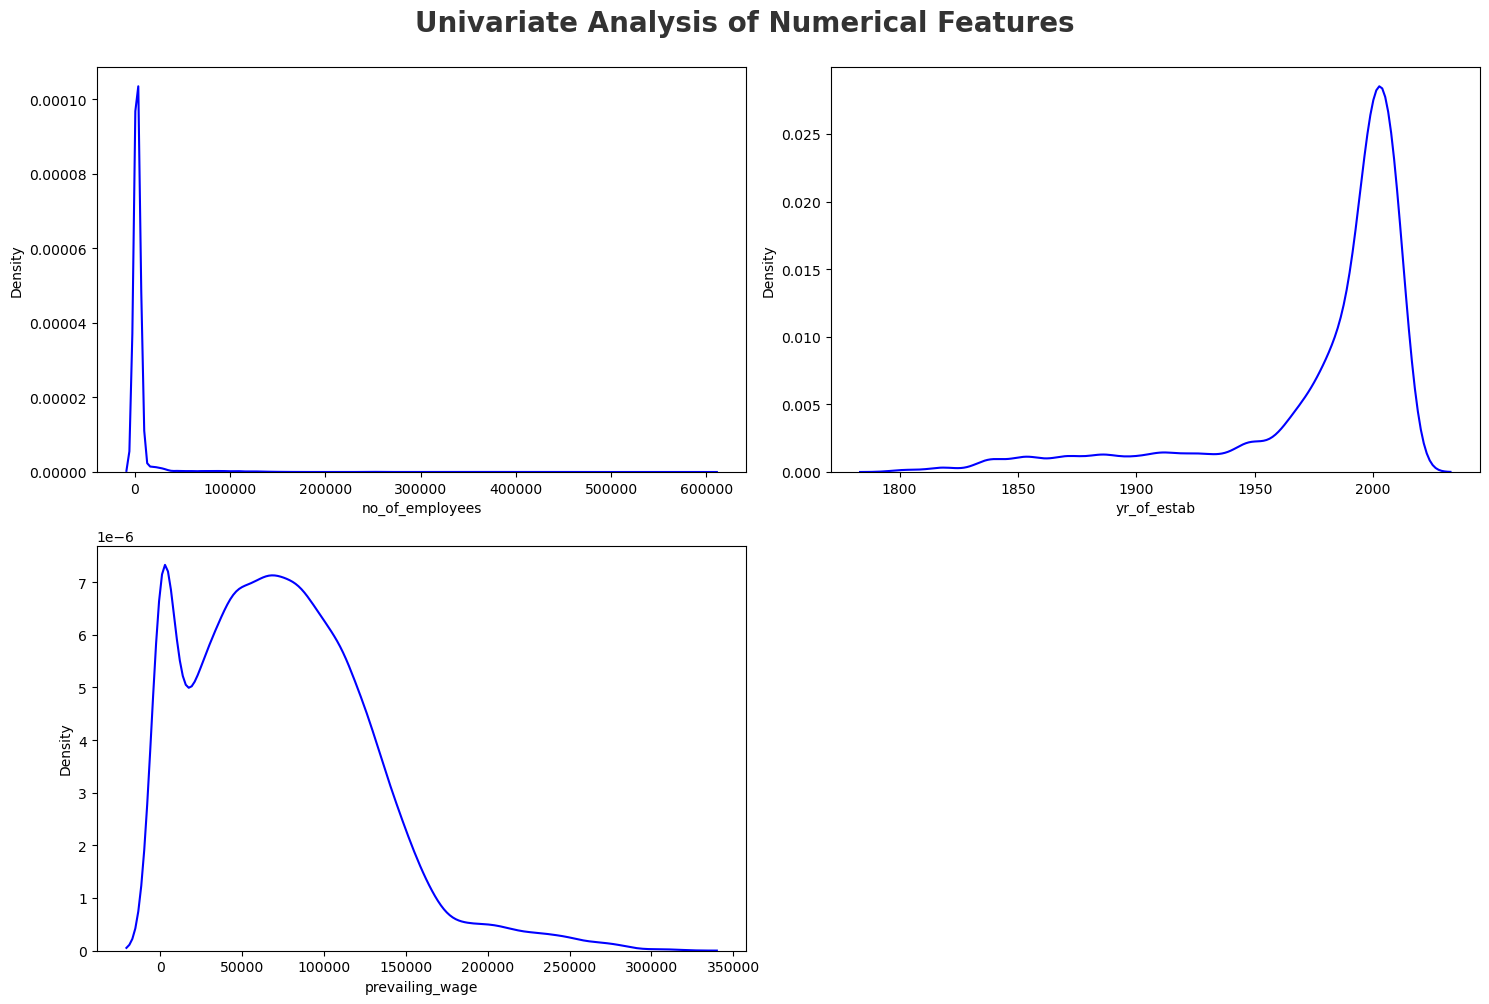

In [14]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.) 

for i in range(0, len(num_cols)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=data[num_cols[i]], color='blue')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

##### Explanation: 
###### A KDE plot (Kernel Density Estimate plot) is a way to visualize the distribution of a single variable (univariate analysis). Think of it as a smooth, continuous curve that shows the probability density of the data.


###### What it does:
###### -> Smoothens the data: Unlike a histogram, which shows data in bins, a KDE plot uses a smooth curve to represent the distribution.
###### -> Estimates the density: It shows where the values are concentrated and how they spread across the range.


###### Probability Density = How packed or dense are the data points in different parts of the range OR how likely it is for a value to fall in a specific range
###### -> Higher density = more data points are concentrated in that region.
###### -> Lower density = fewer data points are in that region.


###### How It Works in a KDE Plot:
###### -> The y-axis doesn’t show "counts" or "frequency" like a histogram.
###### -> Instead, it shows density, which tells you the relative likelihood of a value appearing. 

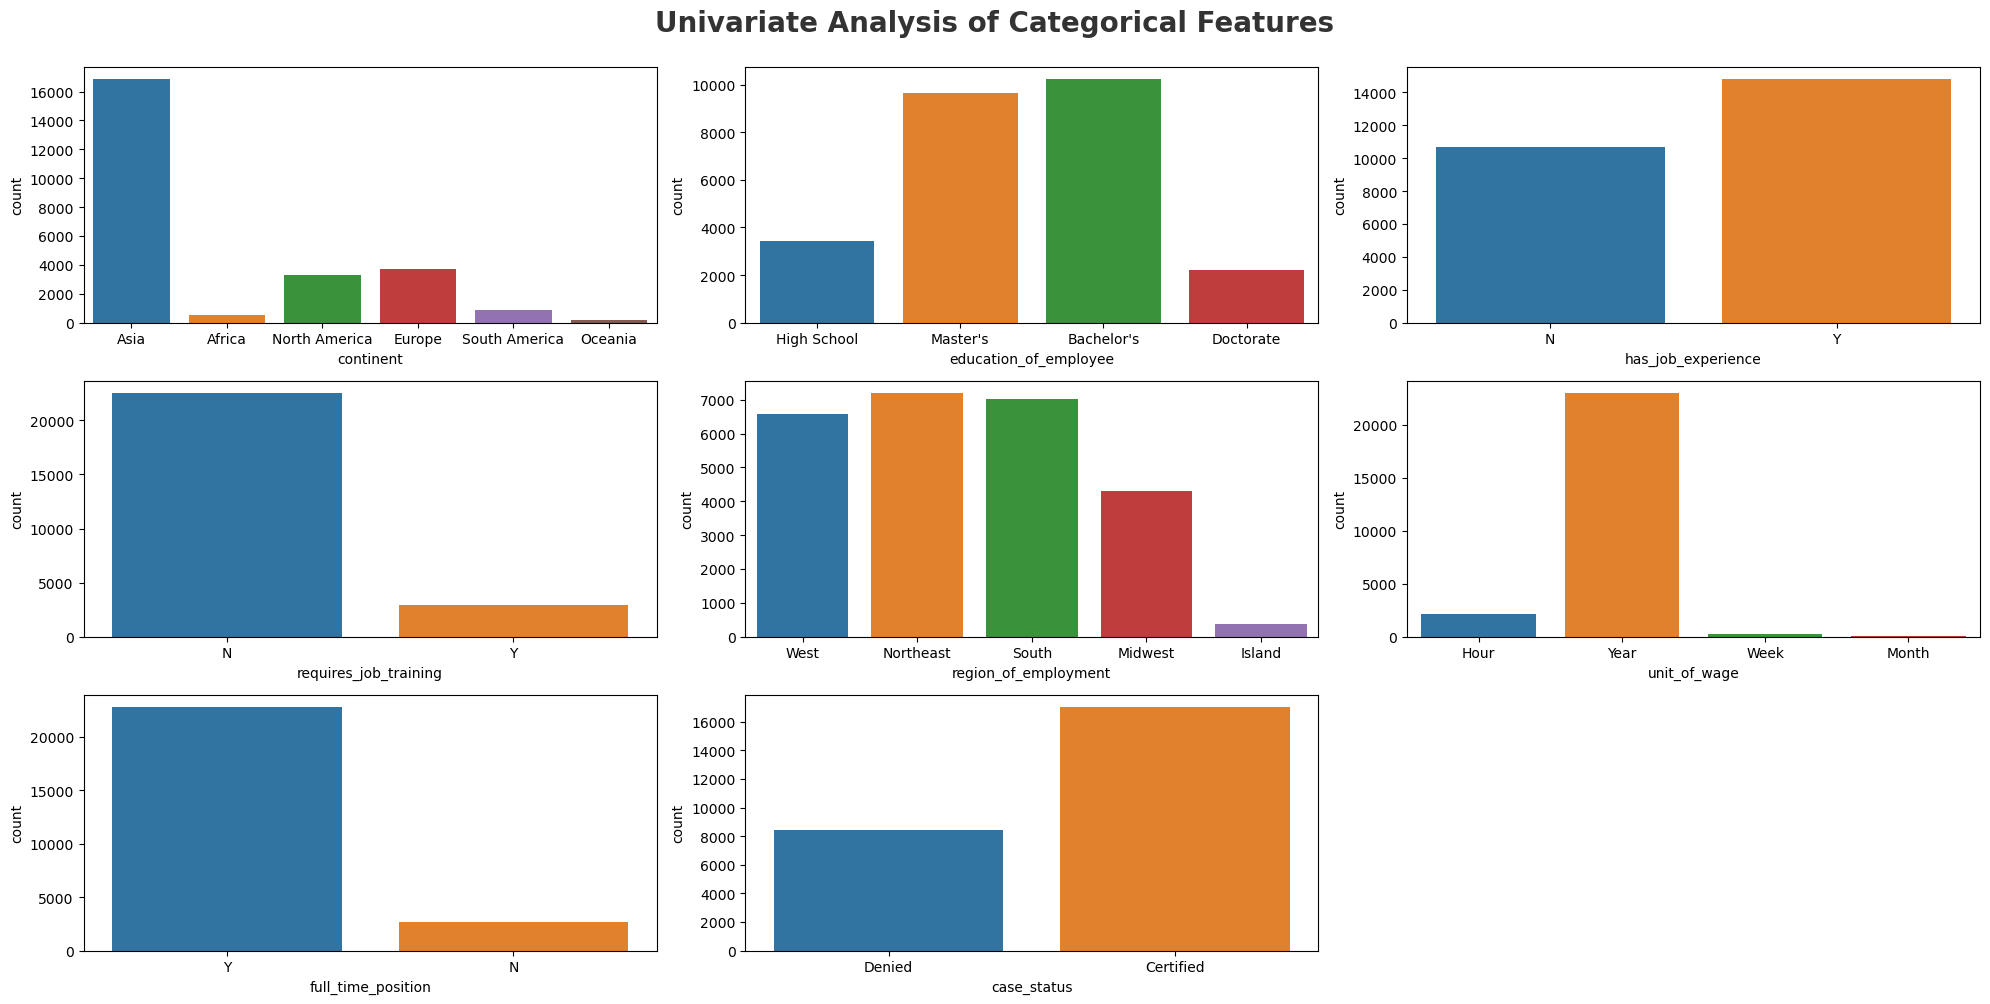

In [15]:
plt.figure(figsize=(20,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.) 

for i in range(0, len(cat_cols)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=data[cat_cols[i]])
    plt.xlabel(cat_cols[i])
    plt.tight_layout()

##### Visualising the target feature: 

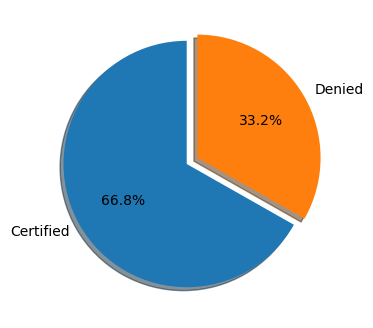

In [16]:
percentage=data.case_status.value_counts(normalize=True)*100
labels=["Certified","Denied"]

fig, ax =plt.subplots(figsize=(7,4))
explode=(0,0.1)
ax.pie(percentage,labels=labels, startangle=90,autopct="%1.1f%%", explode=explode, shadow=True)
plt.show();

##### Q1. How does an applicant's Continent impact their Visa status?

In [17]:
data.groupby(['continent'])['case_status'].value_counts(normalize=True).to_frame() *100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

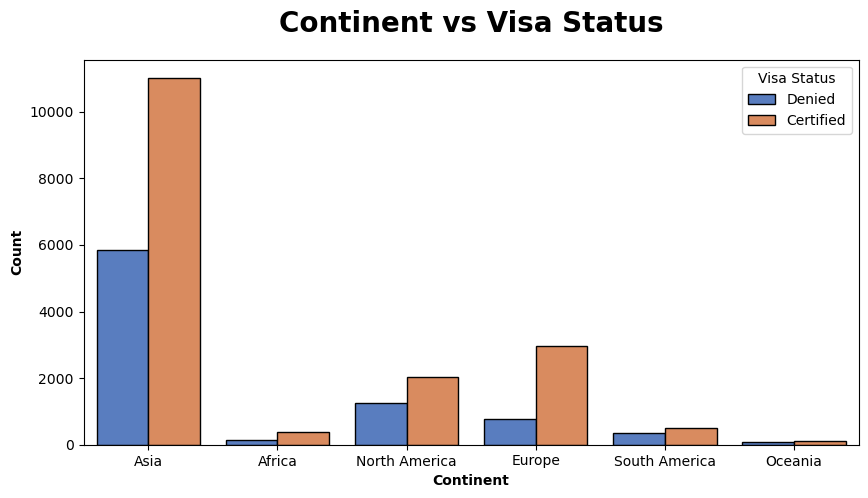

In [18]:
plt.subplots(figsize=(10,5))
sns.countplot(x='continent', hue='case_status', data=data, ec = 'black', palette = 'muted')

plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Continent', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show();

In [19]:
df=data.copy()

In [20]:
data.sample()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
22490,Asia,Master's,N,N,3000,2000,Northeast,166.8968,Hour,Y,Denied


In [42]:
df.continent.value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [21]:
# Calculating the percentage of 'denied' cases by continent
den_percent = (df[df['case_status'].isin(['Denied'])]['continent'].value_counts() / df['continent'].value_counts()*100)
print(den_percent)

Africa           27.949183
Asia             34.689520
Europe           20.766345
North America    38.122722
Oceania          36.458333
South America    42.136150
Name: continent, dtype: float64


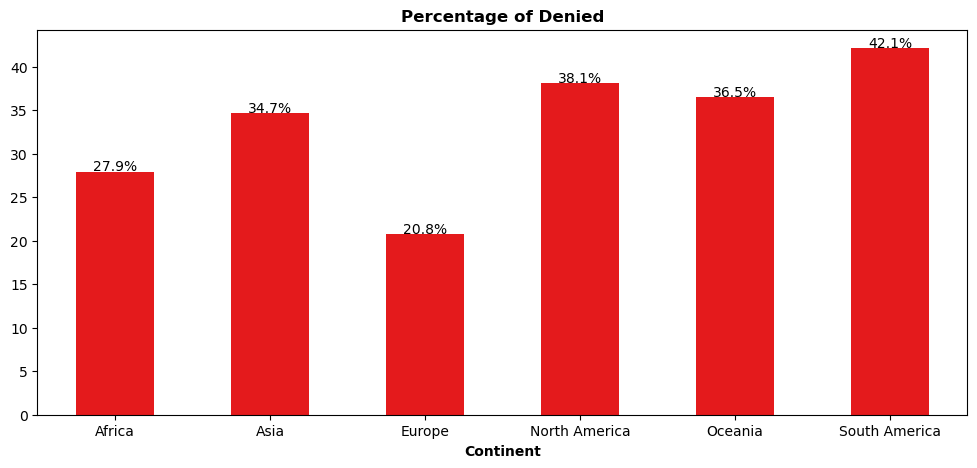

In [96]:
plt.figure(figsize=[12, 5])

den_percent.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(den_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show();

In [23]:
# Similarly, calculating the percentage of 'certified' cases by continent
cert_percent = (df[df['case_status'].isin(['Certified'])]['continent'].value_counts() / df['continent'].value_counts()*100)
print(cert_percent)

Asia             65.310480
Europe           79.233655
North America    61.877278
South America    57.863850
Africa           72.050817
Oceania          63.541667
Name: continent, dtype: float64


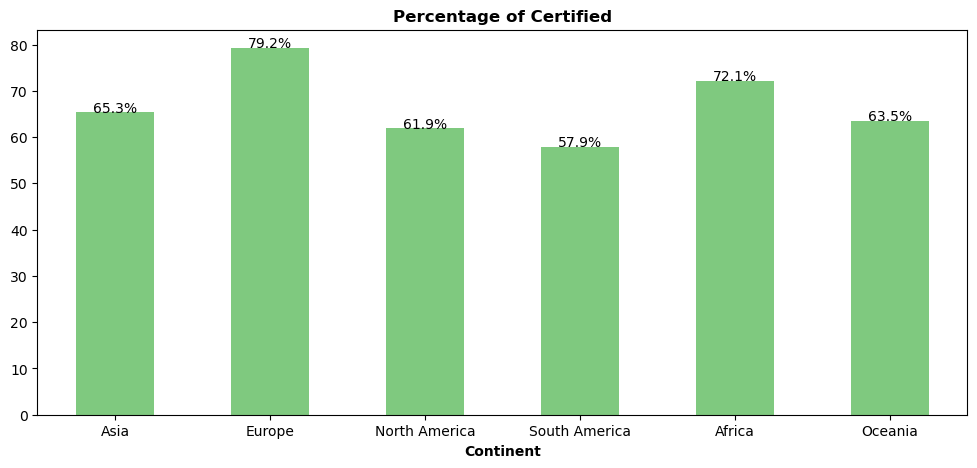

In [24]:
plt.figure(figsize=[12, 5])

cert_percent.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (continent, percentage) in enumerate(cert_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=0)
plt.show();

##### Insights: 
###### -> Europe leads with a 79% visa acceptance rate, making it the region with the highest approval rate. This highlights Europe as a strong contender for visa-related business and opportunities.

###### -> South America has the highest rejection rate at 42%, signaling potential challenges or stricter visa policies that may require targeted strategies for improving acceptance rates.

###### -> Further analysis would be required to understand the reasons behind the high acceptance in Europe and high rejections in South America, identifying how other variables might be influencing these outcomes and whether any relationships exist between them.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### Q2. How does an applicant's Education impact their Visa status?

In [25]:
data.groupby(['education_of_employee'])['case_status'].value_counts(normalize=True).to_frame()*100

case_status
education_of_employee case_status             
Bachelor's            Certified      62.214188
                      Denied         37.785812
Doctorate             Certified      87.226277
                      Denied         12.773723
High School           Denied         65.964912
                      Certified      34.035088
Master's              Certified      78.627777
                      Denied         21.372223

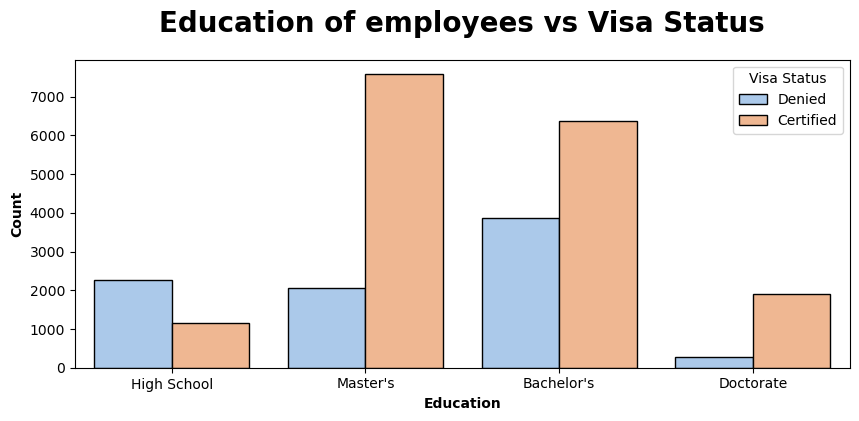

In [26]:
plt.subplots(figsize=(10,4))
sns.countplot(x='education_of_employee', hue='case_status', data=data, ec='black',palette="pastel")

plt.title("Education of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Education', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show();

In [27]:
# Calculating the percentage of 'certified' cases by education
cert_percent_edu= (100 * df[df['case_status'].isin(['Certified'])]['education_of_employee'].value_counts() / df['education_of_employee'].value_counts())
print(cert_percent_edu)

Bachelor's     62.214188
Doctorate      87.226277
High School    34.035088
Master's       78.627777
Name: education_of_employee, dtype: float64


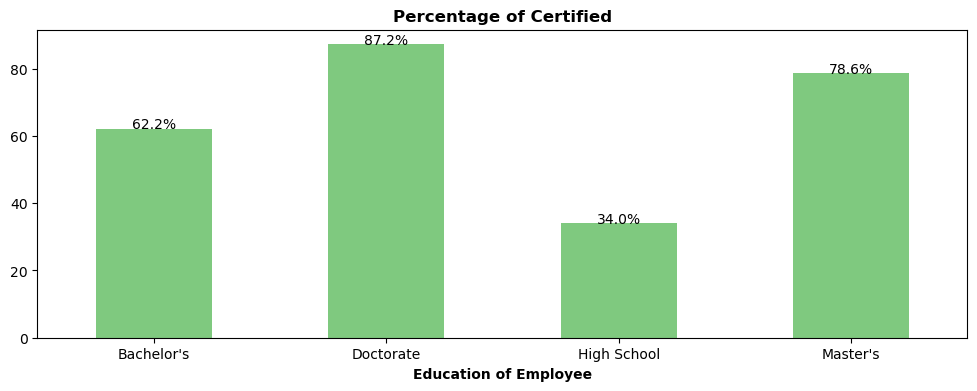

In [28]:
plt.figure(figsize=[12, 4])

cert_percent_edu.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

for n, (education, percentage) in enumerate(cert_percent_edu.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Education of Employee', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

Bachelor's     37.785812
Doctorate      12.773723
High School    65.964912
Master's       21.372223
Name: education_of_employee, dtype: float64 



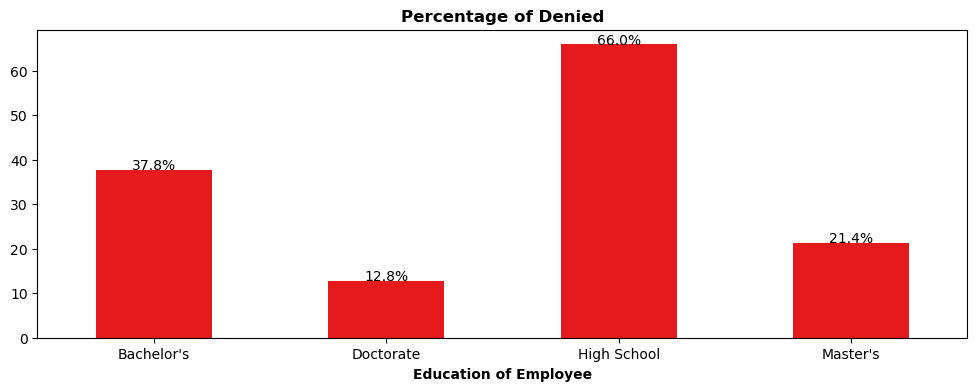

In [97]:
# Calculating the percentage of 'denied' cases by education
den_percent_edu= (100 * df[df['case_status'].isin(['Denied'])]['education_of_employee'].value_counts() / df['education_of_employee'].value_counts())
print(den_percent_edu, '\n')

plt.figure(figsize=[12, 4])

den_percent_edu.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

for n, (education, percentage) in enumerate(den_percent_edu.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Education of Employee', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

##### Insights: 
###### -> Doctorate holders enjoy the highest visa acceptance rate at 87%, making this group the most likely to secure a visa. This suggests that higher levels of education, such as a doctorate, are highly favorable in the visa approval process.

###### -> Masters and Bachelors follow suit with strong acceptance rates, though not as high as doctorates, reflecting a positive but slightly lower trend for these educational levels.

###### -> High school graduates face the highest rejection rate at 66%, signaling a potential barrier for applicants with lower levels of education. This highlights the importance of education qualification in securing a visa.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### Q3. How does an applicant's Work Experience impact their Visa status?

In [30]:
data.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
has_job_experience case_status             
N                  Certified      56.134108
                   Denied         43.865892
Y                  Certified      74.476422
                   Denied         25.523578

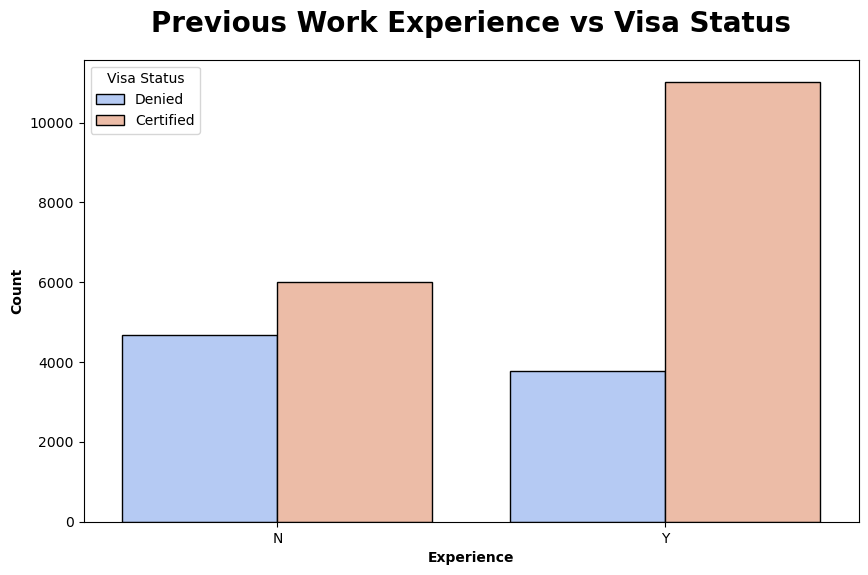

In [43]:
plt.subplots(figsize=(10,6))
sns.countplot(x='has_job_experience', hue='case_status', data=data, ec='black',palette="coolwarm")

plt.title("Previous Work Experience vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Experience', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

Y    74.476422
N    56.134108
Name: has_job_experience, dtype: float64 



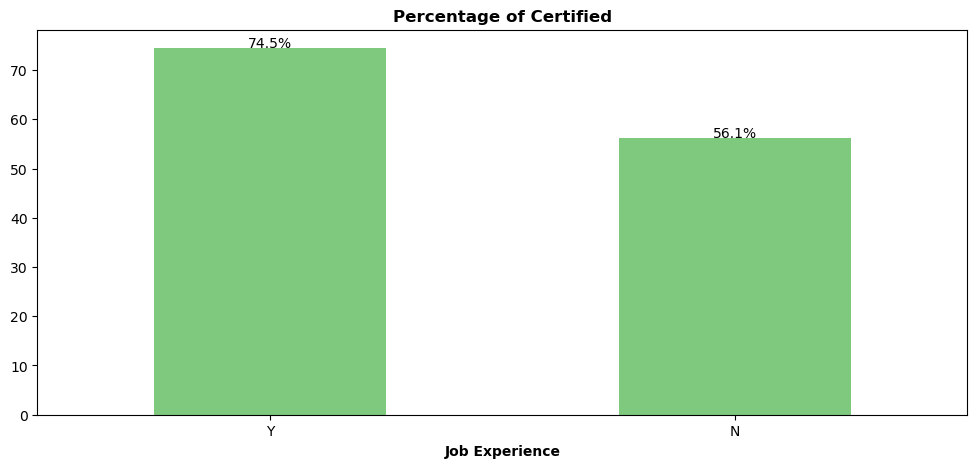

In [32]:
# Calculating the percentage of 'certified' cases by previous job experience
y_job_percent = (100 * df[df['case_status'].isin(['Certified'])]['has_job_experience'].value_counts() / df['has_job_experience'].value_counts())
print(y_job_percent, '\n')

plt.figure(figsize=[12, 5])
y_job_percent.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (job, percentage) in enumerate(y_job_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

N    43.865892
Y    25.523578
Name: has_job_experience, dtype: float64 



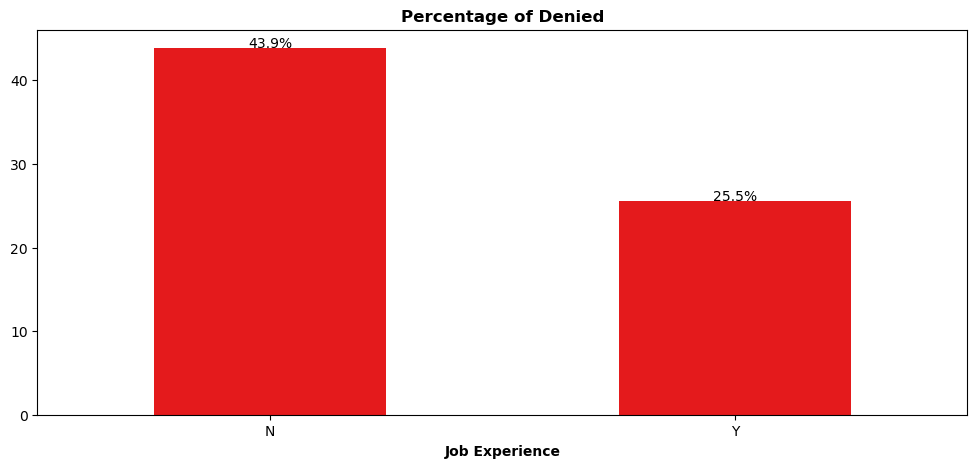

In [98]:
# Calculating the percentage of 'denied' cases by prev job experience
n_job_percent = (100 * df[df['case_status'].isin(['Denied'])]['has_job_experience'].value_counts() / df['has_job_experience'].value_counts())
print(n_job_percent, '\n')

plt.figure(figsize=[12, 5])
n_job_percent.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (job, percentage) in enumerate(n_job_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

##### Insights: 
###### -> Applicants with previous job experience have a higher visa acceptance rate of 74.5%, compared to those without prior experience, who have a lower acceptance rate of 56.1%.

###### -> Applicants with no previous job experience face a higher rejection rate of 43.9%, compared to the 25.5% rejection rate for applicants with work experience. This highlights that having prior work experience is a key factor in reducing the likelihood of rejection.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### Q4. Does an applicant's Job Training Experience have any impact on Visa Status?

In [34]:
data.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
requires_job_training case_status             
N                     Certified      66.645949
                      Denied         33.354051
Y                     Certified      67.884941
                      Denied         32.115059

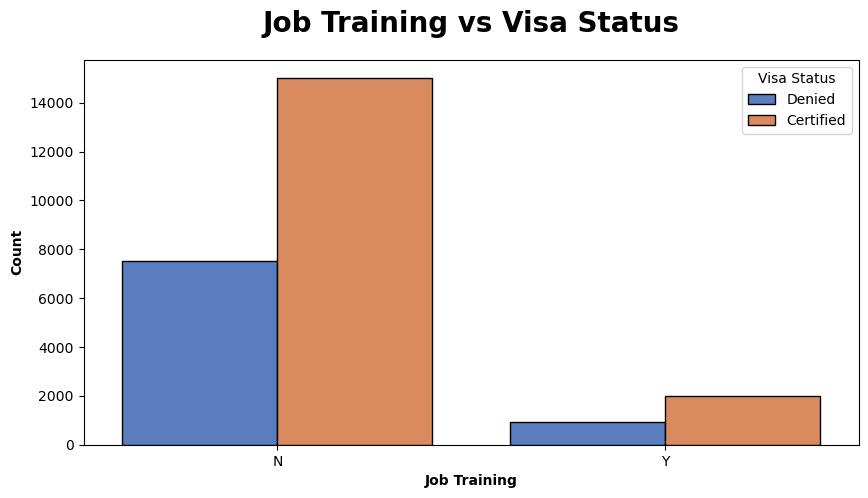

In [35]:
plt.subplots(figsize=(10,5))
sns.countplot(x='requires_job_training', hue='case_status', data=df, ec='black',palette="muted")

plt.title("Job Training vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel('Job Training', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Visa Status', fancybox=True)

plt.show()

N    66.645949
Y    67.884941
Name: requires_job_training, dtype: float64 



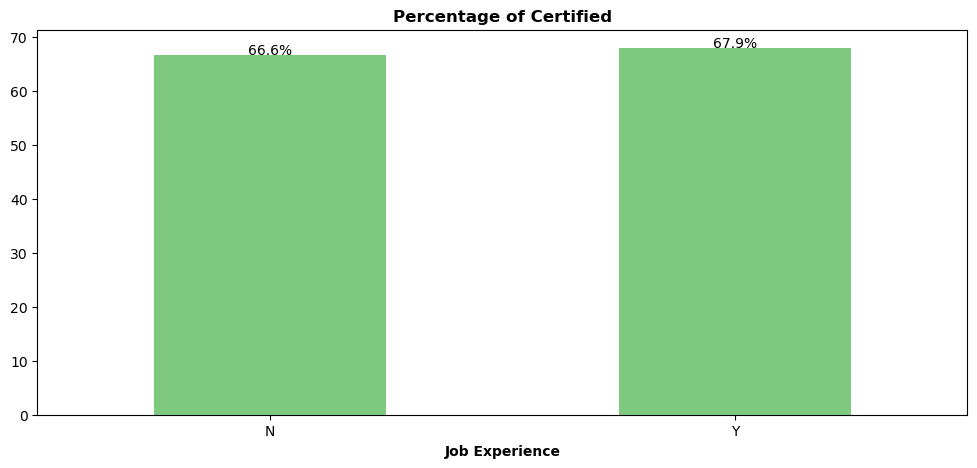

In [36]:
# Calculating the percentage of 'certified' cases by job training experience
y_train_percent = (100 * df[df['case_status'].isin(['Certified'])]['requires_job_training'].value_counts() / df['requires_job_training'].value_counts())
print(y_train_percent, '\n')

plt.figure(figsize=[12, 5])
y_train_percent.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Percentage of Certified", fontweight='bold')

# Adding text labels
for n, (train, percentage) in enumerate(y_train_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

N    33.354051
Y    32.115059
Name: requires_job_training, dtype: float64 



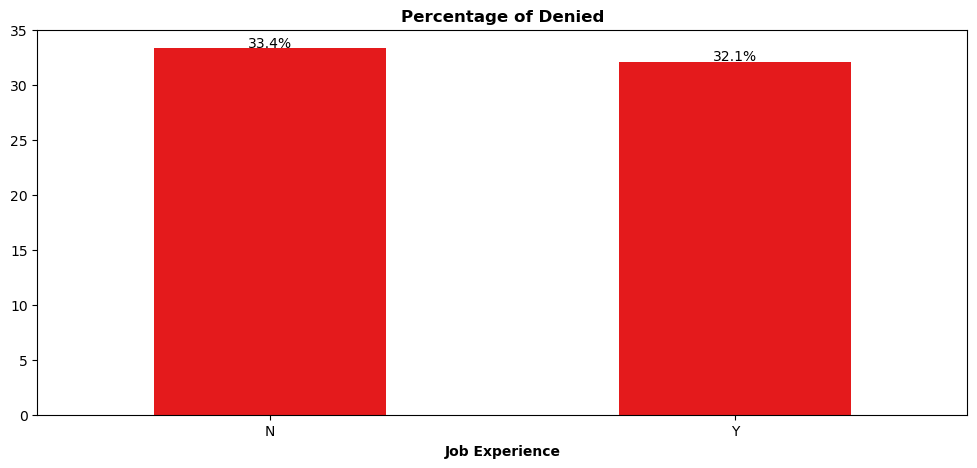

In [99]:
# Calculating the percentage of 'denied' cases by job training experience
n_train_percent = (100 * df[df['case_status'].isin(['Denied'])]['requires_job_training'].value_counts() / df['requires_job_training'].value_counts())
print(n_train_percent, '\n')

plt.figure(figsize=[12, 5])
n_train_percent.plot(kind='bar', stacked=True, colormap='Set1')
plt.title("Percentage of Denied", fontweight='bold')

# Adding text labels
for n, (train, percentage) in enumerate(n_train_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage:.1f}%', ha='center')

plt.xlabel('Job Experience', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

##### Insights: 
###### -> There's a minimal impact of job training experience on Visa Acceptance.

###### -> Rejection rates are almost identical and there's a relatively small difference in the rates between trained and untrained applicants.

###### -> These insights highlight that job training has a minimal effect on visa acceptance or rejection, compared to other factors like education or previous work experience. 

#### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### Q5. Does an applicant's Unit of Wage have any impact on Visa Status?

In [67]:
df.unit_of_wage.value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

In [47]:
data.groupby(['unit_of_wage'])['case_status'].value_counts(normalize=True).to_frame()*100

case_status
unit_of_wage case_status             
Hour         Denied         65.368567
             Certified      34.631433
Month        Certified      61.797753
             Denied         38.202247
Week         Certified      62.132353
             Denied         37.867647
Year         Certified      69.885027
             Denied         30.114973

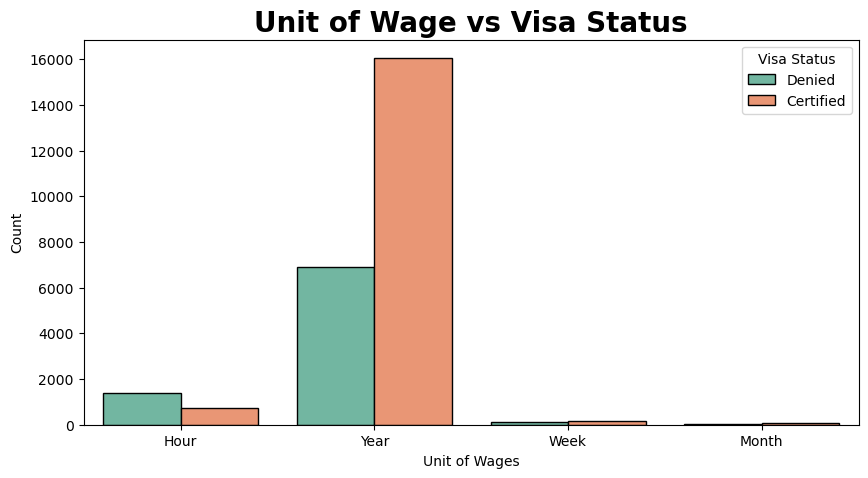

In [54]:
plt.subplots(figsize = (10,5))
sns.countplot(x='unit_of_wage', data = df, hue = 'case_status', ec = 'black', palette = 'Set2')

plt.title('Unit of Wage vs Visa Status', weight = 'bold', fontsize = 20)
plt.xlabel('Unit of Wages')
plt.ylabel('Count')
plt.legend(title='Visa Status', fancybox=True)
plt.show()

In [58]:
# Calculating the percentage of 'certified' cases by unit of wage
cert_wage_percent = 100*df[df['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df['unit_of_wage'].value_counts()
cert_wage_percent

Year     69.885027
Hour     34.631433
Week     62.132353
Month    61.797753
Name: unit_of_wage, dtype: float64

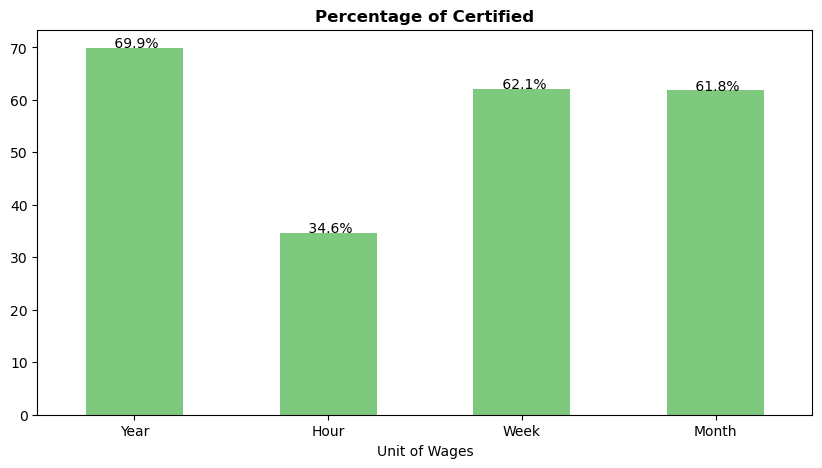

In [66]:
plt.figure(figsize = [10, 5])

cert_wage_percent.plot(kind = 'bar', stacked = True, colormap = 'Accent')
plt.title('Percentage of Certified', fontweight = 'bold')
plt.xlabel('Unit of Wages')
plt.xticks(rotation=0)

#for labels

for n, (wage, percentage) in enumerate(cert_wage_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage: .1f}%', ha = 'center')

plt.show()

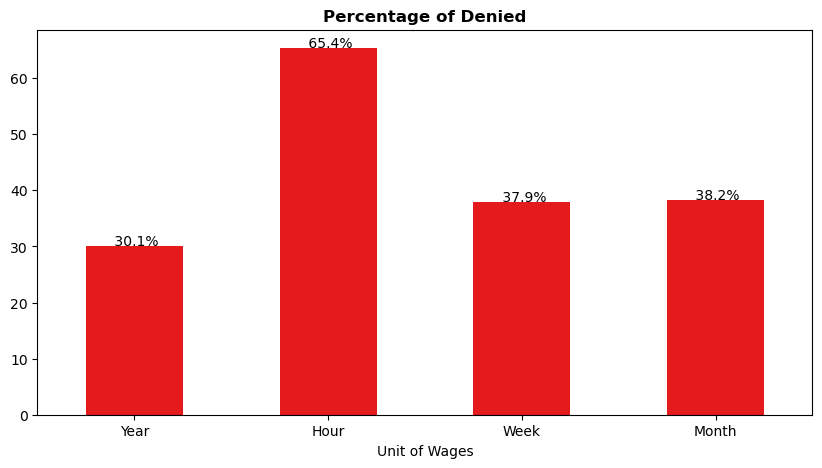

In [100]:
# Calculating the percentage of 'denied' cases by unit of wage
den_wage_percent = 100*df[df['case_status'].isin(['Denied'])]['unit_of_wage'].value_counts()/df['unit_of_wage'].value_counts()
den_wage_percent

plt.figure(figsize = [10, 5])

den_wage_percent.plot(kind = 'bar', stacked = True, colormap = 'Set1')
plt.title('Percentage of Denied', fontweight = 'bold')
plt.xlabel('Unit of Wages')
plt.xticks(rotation=0)

#for labels

for n, (wage, percentage) in enumerate(den_wage_percent.items()):
    plt.text(n, percentage + 0.1, f'{percentage: .1f}%', ha = 'center')

plt.show()

##### Insights: 
###### -> The majority of visa applicants reported having yearly wages, indicating a preference for annual pay structures among candidates.

###### -> Applicants with yearly wages enjoy a significantly higher acceptance rate of approximately 70%, suggesting annual wage earners may align better with visa approval criteria.

###### -> Hourly wage applicants face the highest rejection rate at 65.4%, potentially pointing to concerns around financial stability or consistency in earnings. 

#### ------------------------------------------------------------------------------------------------------------------------------------------------------